In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] and reshape for CNN input (28x28x1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Print dataset shape
print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Training images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


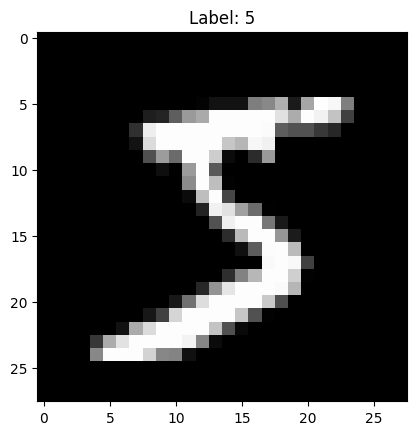

In [12]:
# Plot the first training image
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [13]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),                                             # Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),                            # Second convolutional layer
    layers.MaxPooling2D((2, 2)),                                             # Pooling layer
    layers.Flatten(),                                                        # Flatten to 1D vector
    layers.Dense(64, activation='relu'),                                     # Fully connected layer
    layers.Dense(10, activation='softmax')                                   # Output layer (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model for 5 epochs (adjust as needed)
history = model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8939 - loss: 0.3482 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9840 - loss: 0.0492 - val_accuracy: 0.9868 - val_loss: 0.0407
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9840 - val_loss: 0.0435
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9950 - loss: 0.0162 - val_accuracy: 0.9899 - val_loss: 0.0353


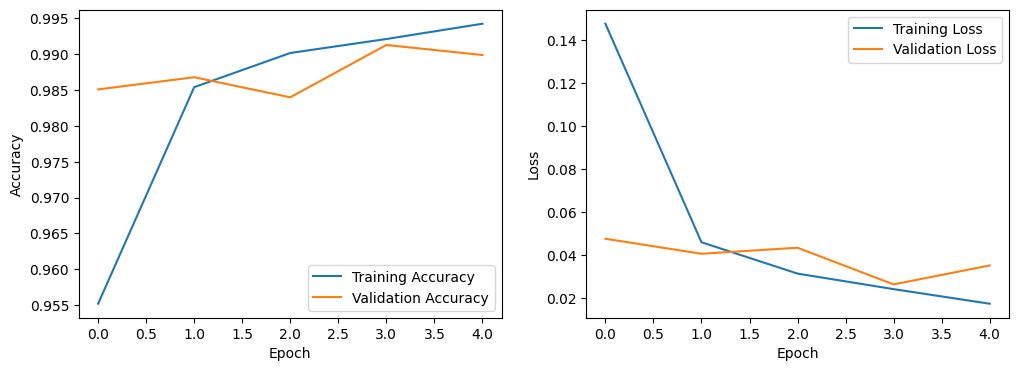

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9859 - loss: 0.0477
Test accuracy: 98.99%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


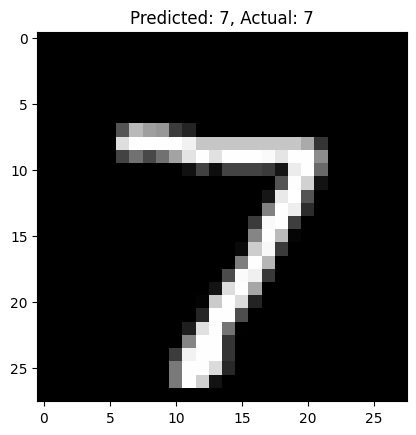

In [17]:
# Predict the first 10 test images
predictions = model.predict(test_images[:20])
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions vs actual labels
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", test_labels[:20])

# Visualize the first test image
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]}, Actual: {test_labels[0]}")
plt.show()

In [18]:
# Redefine the model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Retrain the improved model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Replot performance (same code as Cell 6)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8814 - loss: 0.3755 - val_accuracy: 0.9846 - val_loss: 0.0461
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9800 - loss: 0.0662 - val_accuracy: 0.9876 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9897 - val_loss: 0.0319
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9910 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9926 - val_loss: 0.0224
